## Sai Srihitha Goverdhana U58956033

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

## Collect and prepare data for analysis

In [2]:
df = pd.read_csv('CVS.csv',  parse_dates=True)

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df = df[[ 'Close']]

In [5]:
df

,Close
0,72.839996
1,65.680000
2,66.599998
3,67.730003
4,68.690002
...,...
1255,75.800003
1256,76.139999
1257,74.209999
1258,73.250000


In [6]:
df['Close'].isna().sum()

0

In [7]:
row_count = df.shape[0] # store the number of obersvations (daily temperature readings)
row_count

1260

In [8]:
closes = df.to_numpy() # to make things easier, we create a numpy array from our dataframe of temperatures
closes.shape

(1260, 1)

In [9]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

closes = scaler.fit_transform(closes)

In [10]:
sequence_length = 10

In [11]:
closes = closes[row_count % sequence_length: ]
closes.shape

(1260, 1)

In [12]:
closes = closes.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
closes

array([[-0.23531997, -0.70074748, -0.64094404, ..., -0.54993848,
        -0.68384634, -0.9224107 ],
       [-0.86845761, -0.95621272, -1.02381681, ..., -0.69034712,
        -0.67149593, -0.69554704],
       [-0.75015055, -0.71244817, -0.70464751, ..., -0.6805964 ,
        -0.84960642, -0.80540372],
       ...,
       [ 0.04159668, -0.01170644, -0.0585093 , ..., -0.0585093 ,
        -0.13326337, -0.26587134],
       [-0.20801795, -0.18786688, -0.21711843, ..., -0.01365649,
         0.08384933,  0.07019858],
       [-0.02730724, -0.01105627, -0.10011178, ..., -0.14626447,
        -0.20866812, -0.23531997]])

In [13]:
# create our X and y. 
X = closes[:, :-1] 
y = closes[:, -1]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(88, 9, 1)
(38, 9, 1)


# Simple RNN

Use RNN, LTSM, Gru, and Conv1D techniques to predict the 10th-day closing price. Discuss the performance of each of the models and which one seems to perform the best.

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

np.random.seed(1)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(15, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=45)

Epoch 1/45
3/3 [==============================] - 1s 6ms/step - loss: 0.8947
Epoch 2/45
3/3 [==============================] - 0s 2ms/step - loss: 0.8008
Epoch 3/45
3/3 [==============================] - 0s 5ms/step - loss: 0.7017
Epoch 4/45
3/3 [==============================] - 0s 5ms/step - loss: 0.6127
Epoch 5/45
3/3 [==============================] - 0s 5ms/step - loss: 0.5285
Epoch 6/45
3/3 [==============================] - 0s 4ms/step - loss: 0.4595
Epoch 7/45
3/3 [==============================] - 0s 5ms/step - loss: 0.4032
Epoch 8/45
3/3 [==============================] - 0s 4ms/step - loss: 0.3542
Epoch 9/45
3/3 [==============================] - 0s 2ms/step - loss: 0.3139
Epoch 10/45
3/3 [==============================] - 0s 6ms/step - loss: 0.2849
Epoch 11/45
3/3 [==============================] - 0s 3ms/step - loss: 0.2664
Epoch 12/45
3/3 [==============================] - 0s 5ms/step - loss: 0.2514
Epoch 13/45
3/3 [==============================] - 0s 4ms/step - loss: 0.

### Predictions

In [19]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [20]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [21]:
mean_squared_error(comparison['actual'], comparison['predicted'])

5.176337129190436

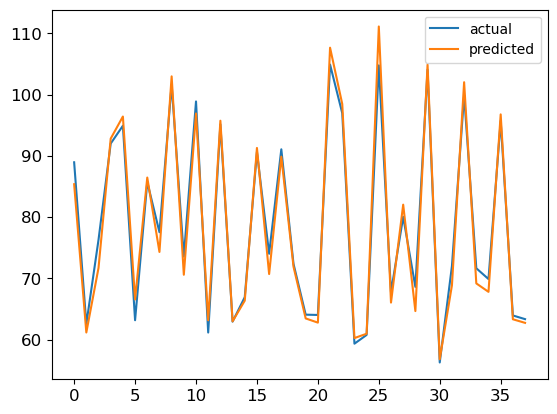

In [22]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with More Layers

In [26]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 8ms/step - loss: 1.1176
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 0.7649
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.5065
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 0.3365
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1981
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 7/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0407
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0222
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0338
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0392
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0270
Epoch 12/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0.

## Predicitons

In [29]:
#Predict:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [31]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [32]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3.5799062961492947

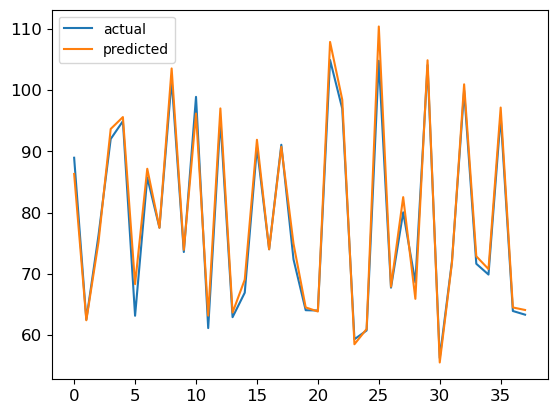

In [33]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with one layer

In [34]:
model = keras.models.Sequential([
    keras.layers.LSTM(10, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 6ms/step - loss: 1.5238
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 1.4567
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 1.3874
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 1.3244
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 1.2609
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 1.2034
Epoch 7/30
3/3 [==============================] - 0s 5ms/step - loss: 1.1545
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 1.1065
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 1.0608
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 1.0135
Epoch 11/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9771
Epoch 12/30
3/3 [==============================] - 0s 4ms/step - loss: 0.9382
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0.

### Predictions

In [36]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [37]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [38]:
mean_squared_error(comparison['actual'], comparison['predicted'])

77.39444741141232

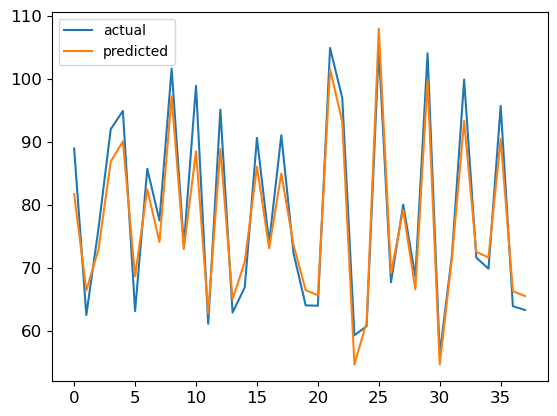

In [31]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [39]:
model = keras.models.Sequential([
    keras.layers.LSTM(10, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(10, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 4s 7ms/step - loss: 0.9820
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 0.9480
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 0.9116
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 0.8763
Epoch 5/30
3/3 [==============================] - 0s 9ms/step - loss: 0.8393
Epoch 6/30
3/3 [==============================] - 0s 10ms/step - loss: 0.8018
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.7645
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7265
Epoch 9/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6859
Epoch 10/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6419
Epoch 11/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6007
Epoch 12/30
3/3 [==============================] - 0s 8ms/step - loss: 0.5541
Epoch 13/30
3/3 [==============================] - 0s 10ms/step - loss: 

#### Predictions

In [41]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 0s/step


In [42]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [43]:
mean_squared_error(comparison['actual'], comparison['predicted'])

12.985988869123172

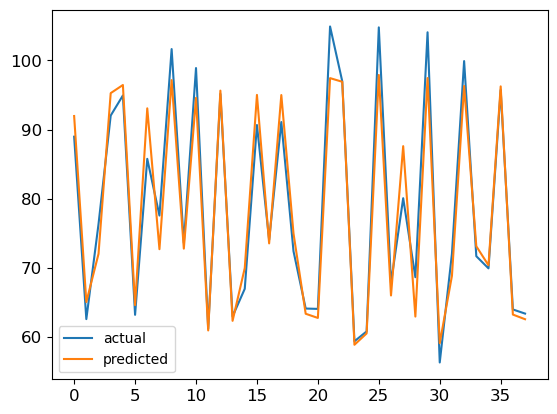

In [44]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [45]:
model = keras.models.Sequential([
    keras.layers.GRU(10, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(10, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 3s 15ms/step - loss: 1.3402
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 1.2685
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 1.2242
Epoch 4/30
3/3 [==============================] - 0s 11ms/step - loss: 1.1890
Epoch 5/30
3/3 [==============================] - 0s 9ms/step - loss: 1.1563
Epoch 6/30
3/3 [==============================] - 0s 8ms/step - loss: 1.1253
Epoch 7/30
3/3 [==============================] - 0s 7ms/step - loss: 1.0966
Epoch 8/30
3/3 [==============================] - 0s 9ms/step - loss: 1.0702
Epoch 9/30
3/3 [==============================] - 0s 7ms/step - loss: 1.0460
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 1.0234
Epoch 11/30
3/3 [==============================] - 0s 9ms/step - loss: 1.0004
Epoch 12/30
3/3 [==============================] - 0s 8ms/step - loss: 0.9799
Epoch 13/30
3/3 [==============================] - 0s 9ms/step - loss: 

#### Predictions

In [47]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [48]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [50]:
mean_squared_error(comparison['actual'], comparison['predicted'])

77.8503334823516

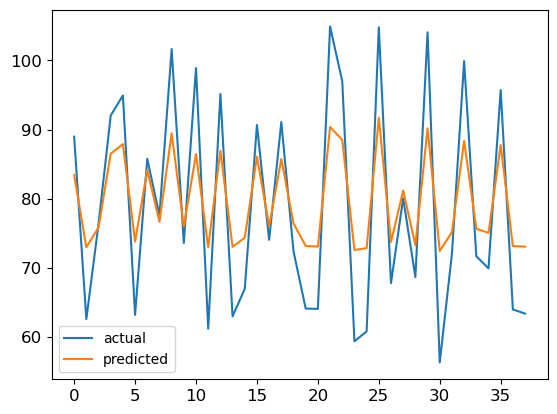

In [51]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

In [52]:

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(10, activation='relu', return_sequences=True),
    keras.layers.GRU(10, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 4s 11ms/step - loss: 1.1483
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 1.0774
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 1.0122
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9678
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.9402
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.9217
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 0.9083
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 0.8935
Epoch 9/30
3/3 [==============================] - 0s 8ms/step - loss: 0.8751
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 0.8540
Epoch 11/30
3/3 [==============================] - 0s 7ms/step - loss: 0.8274
Epoch 12/30
3/3 [==============================] - 0s 7ms/step - loss: 0.7964
Epoch 13/30
3/3 [==============================] - 0s 7ms/step - loss: 0

#### Predictions

In [54]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [55]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [56]:
mean_squared_error(comparison['actual'], comparison['predicted'])

20.09933723163056

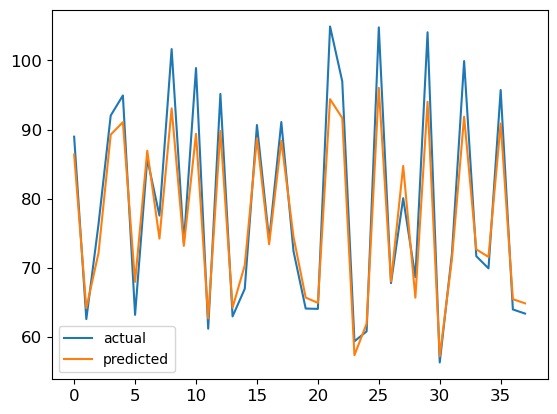

In [58]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Analysis:

		
|Models| Mean Squared Error | loss |
-----|-----|----- 
| Simple RNN|5.176337129|0.0221|
| Simple RNN more layers|3.579906296|0.0124|
| LTSM one Layer |77.39444741|0.4974|
| LTSM More Layers|12.98598887|0.0891|
| GRU More Layers|77.85033348|0.4386|
| Conv1D|20.09933723|0.1004|


## Summary

> Based on the above table, the model with the lowest mean squared error and loss is the "Simple RNN more layers" model, which has a mean squared error of 3.5799 and a loss of 0.0124. This model outperforms the other models,like the LSTM and GRU models, which have higher mean squared error and loss values. 

> Here is a summary of the models and their performance:

> Simple RNN: This model has a MSE of 5.176337129 and a loss of 0.0221.

> Simple RNN with more layers: This model has a lower MSE of 3.579906296 and a lower loss of 0.0124 compared to the simple RNN model.

> LSTM with one layer: This model has a high MSE of 77.39444741 and a high loss of 0.4974.

> LSTM with more layers: This model performs better than the previous LSTM model with a lower MSE of 12.98598887 and a lower loss of 0.0891.

> GRU with more layers: This model has a high MSE of 77.85033348 and a moderate loss of 0.4386.

> Conv1D: This model has a MSE of 20.09933723 and a loss of 0.1004.
Based on the given data, the Simple RNN with more layers has the lowest MSE (3.579906296) and the lowest loss (0.0124), making it the best model among the other models.